# Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

resumes = pd.read_csv('input/dataset.csv' ,encoding='utf-8')
resumes.head()

In [12]:
# Existing categories
resumes['Category'].unique()

array(['hr', 'designer', 'information-technology', 'teacher', 'advocate',
       'business-development', 'healthcare', 'fitness', 'agriculture',
       'consultant', 'digital-media', 'automobile', 'chef', 'finance',
       'apparel', 'accountant', 'construction', 'public-relations',
       'banking', 'arts', 'aviation', 'data science', 'web designing',
       'mechanical engineer', 'sales', 'health and fitness',
       'civil engineer', 'java developer', 'business analyst',
       'sap developer', 'automation testing', 'electrical engineering',
       'operations manager', 'python developer', 'devops engineer',
       'network security engineer', 'pmo', 'database', 'hadoop',
       'etl developer', 'dotnet developer', 'blockchain', 'testing'],
      dtype=object)

In [13]:
resumes['Id'] = resumes.index
resumes.head()

,Category,Resume,Cleaned resume,Id
0,hr,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,NaN,0
1,hr,"HR SPECIALIST, US HR OPERATIONS ...",NaN,1
2,hr,HR DIRECTOR Summary Over 2...,NaN,2
3,hr,HR SPECIALIST Summary Dedica...,NaN,3
4,hr,HR MANAGER Skill Highlights ...,NaN,4


In [14]:
# Category occurrence in the dataset
print (resumes['Category'].value_counts())

hr                           154
arts                         139
advocate                     138
information-technology       120
business-development         120
accountant                   118
chef                         118
finance                      118
fitness                      117
aviation                     117
healthcare                   115
banking                      115
consultant                   115
construction                 112
public-relations             111
designer                     107
teacher                      102
apparel                       97
digital-media                 96
java developer                84
testing                       70
agriculture                   63
devops engineer               55
python developer              48
web designing                 45
hadoop                        42
operations manager            40
blockchain                    40
etl developer                 40
data science                  40
sales     

# NLP Preprocessing

In [15]:
# Function used to clean the resumes

import re
def clean_text(text):
    text = text.lower() # all to lowercase
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text) # remove special characters
    text = re.sub('exprience', 'experience',text) # fixing dataset error
    text = " ".join(text.split())  # remove extra whitespace
    return text

In [16]:
# Saving the cleaned resumes in a new column

resumes['Cleaned resume'] = resumes.Resume.apply(lambda text: clean_text(text))
resumes.head()

,Category,Resume,Cleaned resume,Id
0,hr,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,hr administrator marketing associate hr admini...,0
1,hr,"HR SPECIALIST, US HR OPERATIONS ...",hr specialist us hr operations summary versati...,1
2,hr,HR DIRECTOR Summary Over 2...,hr director summary over 20 years experience i...,2
3,hr,HR SPECIALIST Summary Dedica...,hr specialist summary dedicated driven and dyn...,3
4,hr,HR MANAGER Skill Highlights ...,hr manager skill highlights hr skills hr depar...,4


In [17]:
import nltk
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jacopo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# tokenizing the resumes

tokenized_text = []
cleaned_resumes = ""

for resume in resumes['Resume'].values:
    cleaned_resume = clean_text(resume)
    cleaned_resumes += cleaned_resume
    tokenized_text.extend(nltk.word_tokenize(cleaned_resume))

tokenized_text

['hr',
 'administrator',
 'marketing',
 'associate',
 'hr',
 'administrator',
 'summary',
 'dedicated',
 'customer',
 'service',
 'manager',
 'with',
 '15',
 'years',
 'of',
 'experience',
 'in',
 'hospitality',
 'and',
 'customer',
 'service',
 'management',
 'respected',
 'builder',
 'and',
 'leader',
 'of',
 'customer',
 'focused',
 'teams',
 'strives',
 'to',
 'instill',
 'a',
 'shared',
 'enthusiastic',
 'commitment',
 'to',
 'customer',
 'service',
 'highlights',
 'focused',
 'on',
 'customer',
 'satisfaction',
 'team',
 'management',
 'marketing',
 'savvy',
 'conflict',
 'resolution',
 'techniques',
 'training',
 'and',
 'development',
 'skilled',
 'multi',
 'tasker',
 'client',
 'relations',
 'specialist',
 'accomplishments',
 'missouri',
 'dot',
 'supervisor',
 'training',
 'certification',
 'certified',
 'by',
 'ihg',
 'in',
 'customer',
 'loyalty',
 'and',
 'marketing',
 'by',
 'segment',
 'hilton',
 'worldwide',
 'general',
 'manager',
 'training',
 'certification',
 'accom

In [19]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_en = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jacopo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# removing the stopwords

tokenized_text_filtered = []
for token in tokenized_text:
    if token not in stopwords_en:
        tokenized_text_filtered.append(token)

tokenized_text_filtered

['hr',
 'administrator',
 'marketing',
 'associate',
 'hr',
 'administrator',
 'summary',
 'dedicated',
 'customer',
 'service',
 'manager',
 '15',
 'years',
 'experience',
 'hospitality',
 'customer',
 'service',
 'management',
 'respected',
 'builder',
 'leader',
 'customer',
 'focused',
 'teams',
 'strives',
 'instill',
 'shared',
 'enthusiastic',
 'commitment',
 'customer',
 'service',
 'highlights',
 'focused',
 'customer',
 'satisfaction',
 'team',
 'management',
 'marketing',
 'savvy',
 'conflict',
 'resolution',
 'techniques',
 'training',
 'development',
 'skilled',
 'multi',
 'tasker',
 'client',
 'relations',
 'specialist',
 'accomplishments',
 'missouri',
 'dot',
 'supervisor',
 'training',
 'certification',
 'certified',
 'ihg',
 'customer',
 'loyalty',
 'marketing',
 'segment',
 'hilton',
 'worldwide',
 'general',
 'manager',
 'training',
 'certification',
 'accomplished',
 'trainer',
 'cross',
 'server',
 'hospitality',
 'systems',
 'hilton',
 'onq',
 'micros',
 'opera',

In [22]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jacopo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [23]:
# Part-of-speech tagging

pos_tagging = nltk.pos_tag(tokenized_text_filtered)
pos_tagging

[('hr', 'NN'),
 ('administrator', 'NN'),
 ('marketing', 'NN'),
 ('associate', 'JJ'),
 ('hr', 'NN'),
 ('administrator', 'NN'),
 ('summary', 'NN'),
 ('dedicated', 'VBN'),
 ('customer', 'NN'),
 ('service', 'NN'),
 ('manager', 'NN'),
 ('15', 'CD'),
 ('years', 'NNS'),
 ('experience', 'NN'),
 ('hospitality', 'NN'),
 ('customer', 'NN'),
 ('service', 'NN'),
 ('management', 'NN'),
 ('respected', 'VBD'),
 ('builder', 'NN'),
 ('leader', 'NN'),
 ('customer', 'NN'),
 ('focused', 'VBD'),
 ('teams', 'NNS'),
 ('strives', 'NNS'),
 ('instill', 'RB'),
 ('shared', 'VBN'),
 ('enthusiastic', 'JJ'),
 ('commitment', 'NN'),
 ('customer', 'NN'),
 ('service', 'NN'),
 ('highlights', 'NNS'),
 ('focused', 'VBD'),
 ('customer', 'NN'),
 ('satisfaction', 'NN'),
 ('team', 'NN'),
 ('management', 'NN'),
 ('marketing', 'NN'),
 ('savvy', 'NN'),
 ('conflict', 'NN'),
 ('resolution', 'NN'),
 ('techniques', 'NNS'),
 ('training', 'VBG'),
 ('development', 'NN'),
 ('skilled', 'VBD'),
 ('multi', 'NNS'),
 ('tasker', 'NN'),
 ('clien

In [24]:
# Simplifying part-of-speech tagging

def simpler_pos_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return "a"
    elif nltk_tag.startswith('V'):
        return "v"
    elif nltk_tag.startswith('N'):
        return "n"
    elif nltk_tag.startswith('R'):
        return "r"
    else:
        return None

simpler_POS_text = []

# for each tuple of the list, we create a new tuple: the first element is the token, the second is
# the simplified pos tag, obtained calling the function simpler_pos_tag()
# then we append the new created tuple to a new list, which will be the output
for POS_tuple in pos_tagging:
    simpler_POS_text.append((POS_tuple[0], simpler_pos_tag(POS_tuple[1])))

simpler_POS_text

[('hr', 'n'),
 ('administrator', 'n'),
 ('marketing', 'n'),
 ('associate', 'a'),
 ('hr', 'n'),
 ('administrator', 'n'),
 ('summary', 'n'),
 ('dedicated', 'v'),
 ('customer', 'n'),
 ('service', 'n'),
 ('manager', 'n'),
 ('15', None),
 ('years', 'n'),
 ('experience', 'n'),
 ('hospitality', 'n'),
 ('customer', 'n'),
 ('service', 'n'),
 ('management', 'n'),
 ('respected', 'v'),
 ('builder', 'n'),
 ('leader', 'n'),
 ('customer', 'n'),
 ('focused', 'v'),
 ('teams', 'n'),
 ('strives', 'n'),
 ('instill', 'r'),
 ('shared', 'v'),
 ('enthusiastic', 'a'),
 ('commitment', 'n'),
 ('customer', 'n'),
 ('service', 'n'),
 ('highlights', 'n'),
 ('focused', 'v'),
 ('customer', 'n'),
 ('satisfaction', 'n'),
 ('team', 'n'),
 ('management', 'n'),
 ('marketing', 'n'),
 ('savvy', 'n'),
 ('conflict', 'n'),
 ('resolution', 'n'),
 ('techniques', 'n'),
 ('training', 'v'),
 ('development', 'n'),
 ('skilled', 'v'),
 ('multi', 'n'),
 ('tasker', 'n'),
 ('client', 'n'),
 ('relations', 'n'),
 ('specialist', 'v'),
 ('acc

In [25]:
# Lemmatizing

nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /Users/jacopo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
lemmatized_text = []

for POS_tuple in simpler_POS_text:
    if POS_tuple[1] is None:
        lemmatized_text.append(lemmatizer.lemmatize(POS_tuple[0]))
    else:
        lemmatized_text.append(lemmatizer.lemmatize(POS_tuple[0], pos=POS_tuple[1]))

lemmatized_text

['hr',
 'administrator',
 'marketing',
 'associate',
 'hr',
 'administrator',
 'summary',
 'dedicate',
 'customer',
 'service',
 'manager',
 '15',
 'year',
 'experience',
 'hospitality',
 'customer',
 'service',
 'management',
 'respect',
 'builder',
 'leader',
 'customer',
 'focus',
 'team',
 'strives',
 'instill',
 'share',
 'enthusiastic',
 'commitment',
 'customer',
 'service',
 'highlight',
 'focus',
 'customer',
 'satisfaction',
 'team',
 'management',
 'marketing',
 'savvy',
 'conflict',
 'resolution',
 'technique',
 'train',
 'development',
 'skilled',
 'multi',
 'tasker',
 'client',
 'relation',
 'specialist',
 'accomplishment',
 'missouri',
 'dot',
 'supervisor',
 'training',
 'certification',
 'certify',
 'ihg',
 'customer',
 'loyalty',
 'marketing',
 'segment',
 'hilton',
 'worldwide',
 'general',
 'manager',
 'training',
 'certification',
 'accomplish',
 'trainer',
 'cross',
 'server',
 'hospitality',
 'system',
 'hilton',
 'onq',
 'micros',
 'opera',
 'pms',
 'fidelio',
 

# Word Cloud

In [243]:
# Calculating word frequency distribution

word_frequency_distribution = nltk.FreqDist(lemmatized_text)
most_common = word_frequency_distribution.most_common(50)
print(most_common)

[('company', 18701), ('state', 16482), ('city', 14496), ('management', 13681), ('customer', 12191), ('name', 11607), ('project', 11263), ('work', 10535), ('experience', 10339), ('service', 10275), ('sale', 9295), ('skill', 9223), ('business', 9189), ('team', 8780), ('system', 8465), ('client', 7859), ('manage', 7152), ('process', 7137), ('report', 6696), ('development', 6674), ('new', 6657), ('develop', 6501), ('maintain', 6344), ('include', 6303), ('provide', 6274), ('plan', 6022), ('manager', 6011), ('program', 5830), ('account', 5821), ('use', 5805), ('design', 5784), ('data', 5746), ('support', 5515), ('product', 5054), ('year', 5028), ('information', 4946), ('education', 4827), ('office', 4718), ('test', 4713), ('create', 4694), ('staff', 4670), ('month', 4614), ('employee', 4608), ('ensure', 4585), ('operation', 4406), ('detail', 4364), ('financial', 4356), ('professional', 4218), ('university', 4105), ('communication', 3950)]


## General Word Cloud

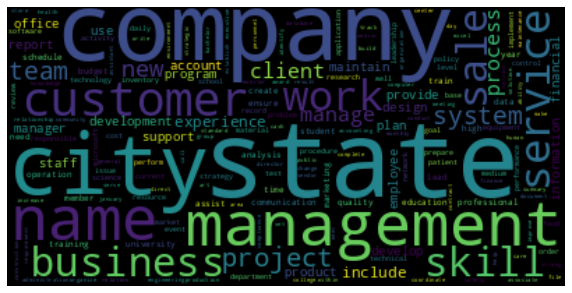

In [198]:
# Word Cloud

word_cloud = WordCloud(collocations=False, stopwords=stopwords_en).generate(" ".join(lemmatized_text))
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Cloud for each category

In [25]:
# We want to create a Word Cloud for each category, so we separate all the resumes

cleaned_resumes_category = {}
tokenized_text_category = {}

categories = resumes['Category'].unique()

for category in categories:
    cleaned_resumes_category[category] = ""
    tokenized_text_category[category] = []

In [26]:
for resume in resumes.values:
    cleaned_resume = clean_text(resume[1])
    tokenized_text = nltk.word_tokenize(cleaned_resume)
    for token in tokenized_text:
        if token not in stopwords_en:
            tokenized_text_category[resume[0]].append(token)

pos_tagging_category = {}

for category in categories:
    pos_tagging_category[category] = nltk.pos_tag(tokenized_text_category[category])


simpler_POS_text_category = {}

# for each tuple of the list, we create a new tuple: the first element is the token, the second is
# the simplified pos tag, obtained calling the function simpler_pos_tag()
# then we append the new created tuple to a new list, which will be the output
for category in categories:
    simpler_POS_text_category[category] = []
    for POS_tuple in pos_tagging_category[category]:
        simpler_POS_text_category[category].append((POS_tuple[0], simpler_pos_tag(POS_tuple[1])))

lemmatized_text_category = {}

for category in categories:
    lemmatized_text_category[category] = []
    for POS_tuple in simpler_POS_text_category[category]:
        if POS_tuple[1] is None:
            lemmatized_text_category[category].append(lemmatizer.lemmatize(POS_tuple[0]))
        else:
            lemmatized_text_category[category].append(lemmatizer.lemmatize(POS_tuple[0], pos=POS_tuple[1]))

lemmatized_text_category

{'hr': ['hr',
  'administrator',
  'marketing',
  'associate',
  'hr',
  'administrator',
  'summary',
  'dedicate',
  'customer',
  'service',
  'manager',
  '15',
  'year',
  'experience',
  'hospitality',
  'customer',
  'service',
  'management',
  'respect',
  'builder',
  'leader',
  'customer',
  'focus',
  'team',
  'strives',
  'instill',
  'share',
  'enthusiastic',
  'commitment',
  'customer',
  'service',
  'highlight',
  'focus',
  'customer',
  'satisfaction',
  'team',
  'management',
  'marketing',
  'savvy',
  'conflict',
  'resolution',
  'technique',
  'train',
  'development',
  'skilled',
  'multi',
  'tasker',
  'client',
  'relation',
  'specialist',
  'accomplishment',
  'missouri',
  'dot',
  'supervisor',
  'training',
  'certification',
  'certify',
  'ihg',
  'customer',
  'loyalty',
  'marketing',
  'segment',
  'hilton',
  'worldwide',
  'general',
  'manager',
  'training',
  'certification',
  'accomplish',
  'trainer',
  'cross',
  'server',
  'hospita

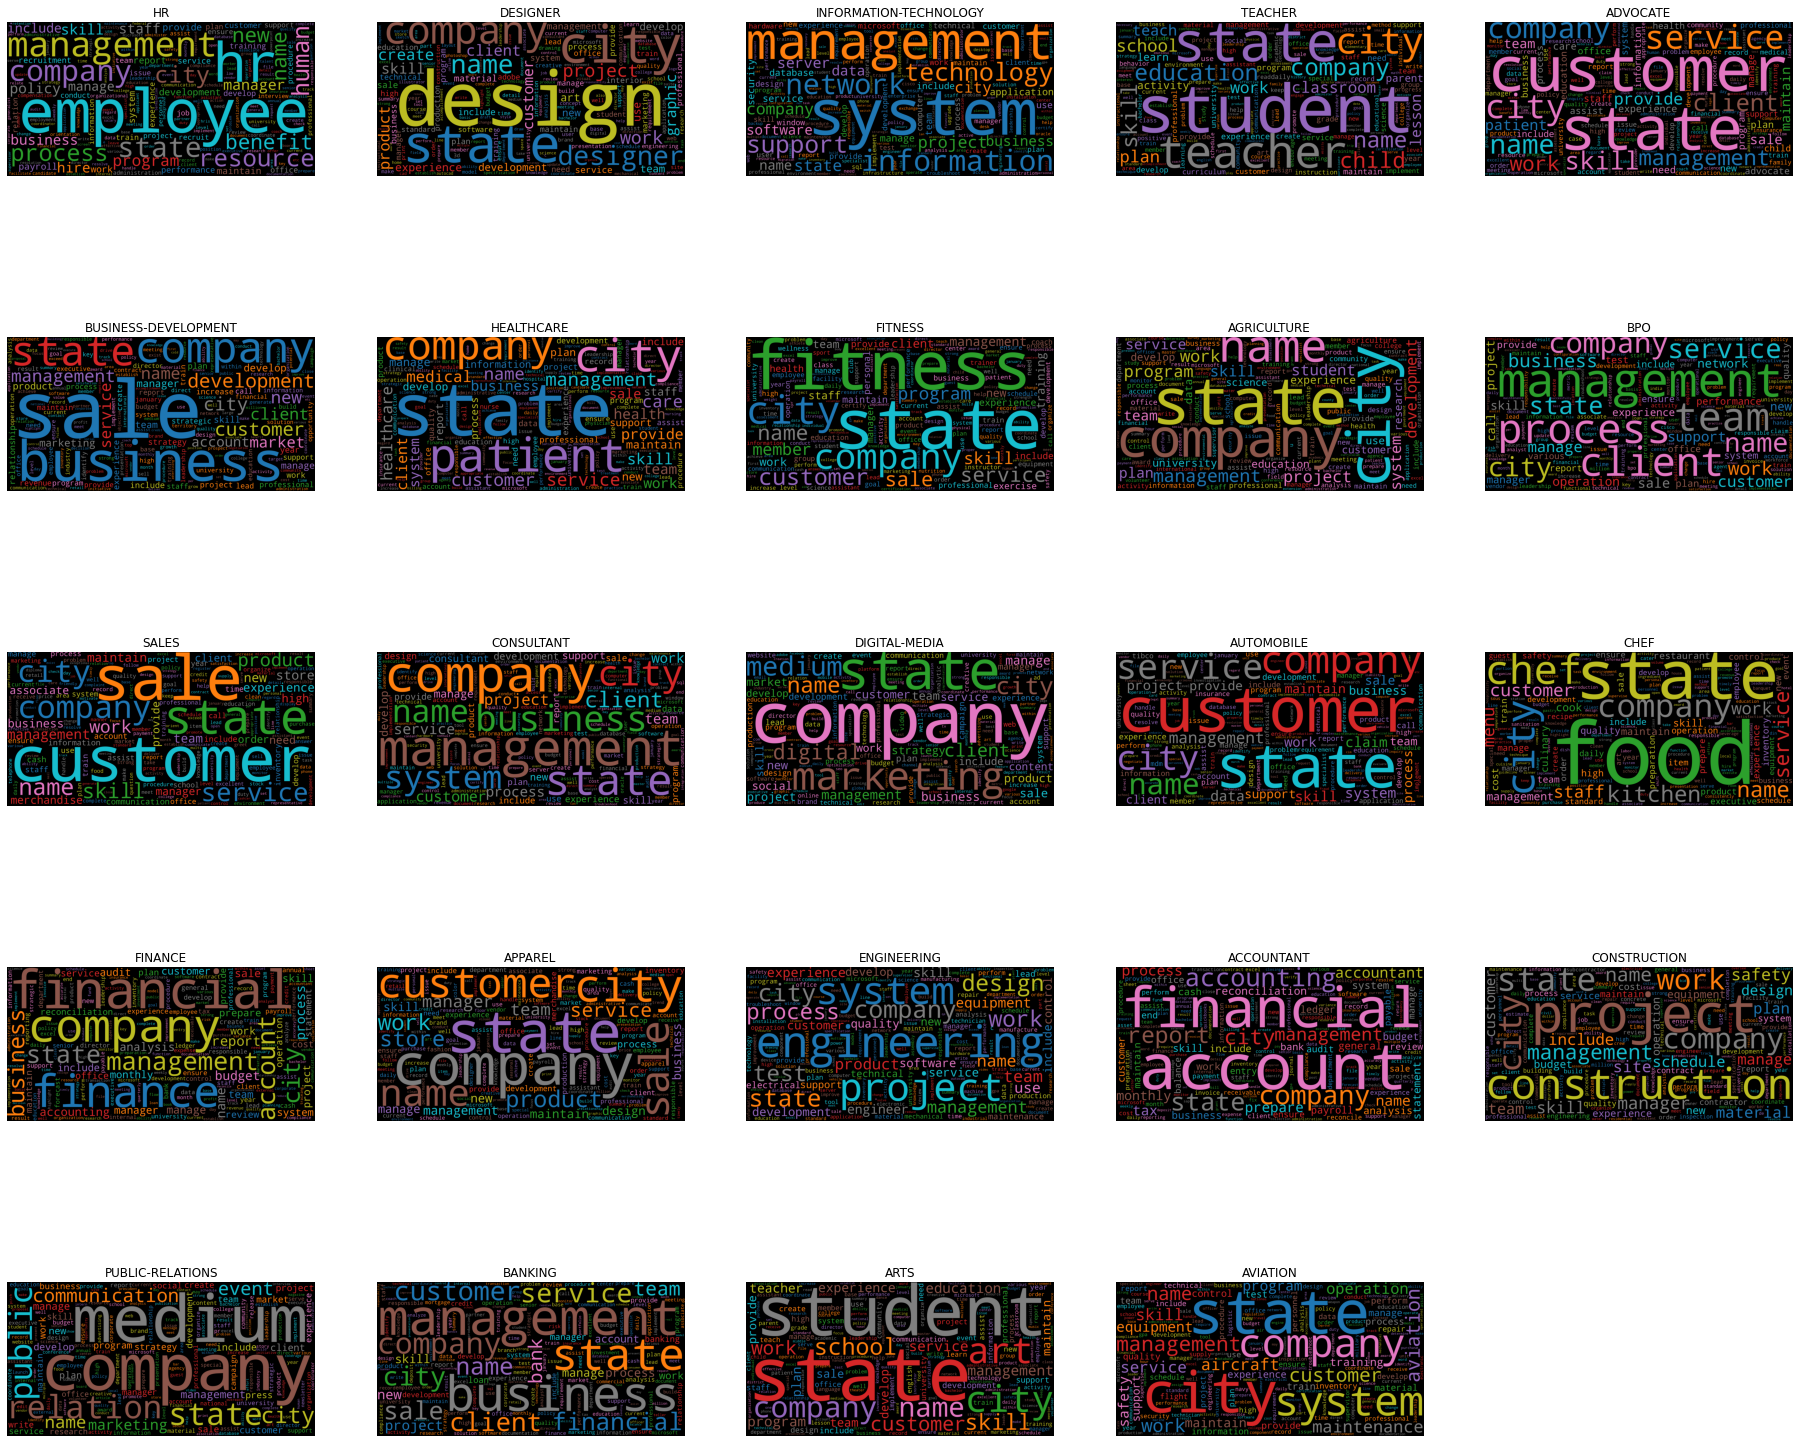

In [214]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    word_cloud = WordCloud(collocations=False, stopwords=stopwords_en, height=2000, width=4000, colormap='tab10_r').generate(" ".join(lemmatized_text_category[category]))
    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(word_cloud)
    plt.axis('off')

plt.show()
plt.close()

# Classification

In [27]:
# Encoding each category with a label

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
resumes['Category_label'] = label_encoder.fit_transform(resumes['Category'])
resumes.head()

,Category,Resume,Cleaned resume,Id,Category_label
0,hr,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,hr administrator marketing associate hr admini...,0,29
1,hr,"HR SPECIALIST, US HR OPERATIONS ...",hr specialist us hr operations summary versati...,1,29
2,hr,HR DIRECTOR Summary Over 2...,hr director summary over 20 years experience i...,2,29
3,hr,HR SPECIALIST Summary Dedica...,hr specialist summary dedicated driven and dyn...,3,29
4,hr,HR MANAGER Skill Highlights ...,hr manager skill highlights hr skills hr depar...,4,29


In [74]:
category_label = {}
labels = label_encoder.fit_transform(resumes['Category'])
for i, category in enumerate(resumes['Category']):
    category_label[labels[i]] = category

category_label

{29: 'hr',
 18: 'designer',
 30: 'information-technology',
 40: 'teacher',
 1: 'advocate',
 11: 'business-development',
 28: 'healthcare',
 25: 'fitness',
 2: 'agriculture',
 15: 'consultant',
 20: 'digital-media',
 6: 'automobile',
 12: 'chef',
 24: 'finance',
 3: 'apparel',
 0: 'accountant',
 14: 'construction',
 36: 'public-relations',
 8: 'banking',
 4: 'arts',
 7: 'aviation',
 16: 'data science',
 42: 'web designing',
 32: 'mechanical engineer',
 38: 'sales',
 27: 'health and fitness',
 13: 'civil engineer',
 31: 'java developer',
 10: 'business analyst',
 39: 'sap developer',
 5: 'automation testing',
 22: 'electrical engineering',
 34: 'operations manager',
 37: 'python developer',
 19: 'devops engineer',
 33: 'network security engineer',
 35: 'pmo',
 17: 'database',
 26: 'hadoop',
 23: 'etl developer',
 21: 'dotnet developer',
 9: 'blockchain',
 41: 'testing'}

In [7]:
def clean(text):
    text = clean_text(text)
    tokens = nltk.word_tokenize(text)
    tokens_filtered = []
    for token in tokens:
        if token not in stopwords_en:
            tokens_filtered.append(token)

    pos_tagging = nltk.pos_tag(tokens_filtered)

    simpler_POS_text = []

    for tuple in pos_tagging:
        POS_tuple = (tuple[0], simpler_pos_tag(tuple[1]))
        simpler_POS_text.append(POS_tuple)

    lemmatized_text = []

    for tuple in simpler_POS_text:
        if tuple[1] == None:
            lemmatized_text.append(lemmatizer.lemmatize(tuple[0]))
        else:
            lemmatized_text.append(lemmatizer.lemmatize(tuple[0], pos=tuple[1]))

    return lemmatized_text

In [ ]:
# Splitting the dataset into train and test

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

labels = resumes['Category_label']

word_vectorizer = TfidfVectorizer(analyzer=clean)
word_vectorizer.fit(resumes['Resume'])
vectorized_resumes = word_vectorizer.transform(resumes['Resume'])

In [59]:
# Performing cross validation for a better accuracy score and comparing the scores of different classification algorithms

from sklearn.model_selection import cross_val_score
X = vectorized_resumes
y = resumes['Category_label']

scores = []
classifiers = []

In [60]:
from sklearn.neighbors import KNeighborsClassifier

k_nearest_neighbors = KNeighborsClassifier()
scores.append(cross_val_score(k_nearest_neighbors,X,y,cv=10).mean())
classifiers.append("K-Nearest Neighbors")

In [61]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
scores.append(cross_val_score(random_forest,X,y,cv=10).mean())
classifiers.append("Random Forest")

In [62]:
from sklearn.svm import LinearSVC

support_vector = LinearSVC()
scores.append(cross_val_score(support_vector,X,y,cv=10).mean())
classifiers.append("Support Vector")

In [63]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier()
scores.append(cross_val_score(ada_boost,X,y,cv=10).mean())
classifiers.append("AdaBoost")

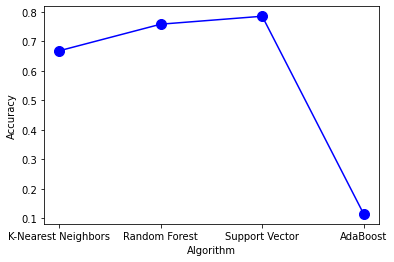

In [105]:
plt.plot(classifiers, scores, color='blue', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Linear Support Vector Classifier

from sklearn.svm import LinearSVC


X_train,X_test,y_train,y_test = train_test_split(vectorized_resumes,labels,random_state=42, test_size=0.2,shuffle=True, stratify=labels)
print(X_train.shape)
print(X_test.shape)

linear_SVC = LinearSVC()
linear_SVC.fit(X_train, y_train)
prediction = linear_SVC.predict(X_test)
print('Accuracy of Linear Support Vector on training set: {:.2f}'.format(linear_SVC.score(X_train, y_train)))
print('Accuracy of Linear Support Vector on test set:     {:.2f}'.format(linear_SVC.score(X_test, y_test)))

In [ ]:
check = []
check_wrong = []

errors_for_category = {}

for label, category in category_label.items():
    errors_for_category[category] = 0

for i, test in enumerate(y_test):
    check.append({'prediction': category_label[prediction[i]], 'test': category_label[test]})

for elem in check:
    if elem['prediction'] != elem['test']:
        check_wrong.append(elem)
        errors_for_category[elem['prediction']] = errors_for_category[elem['prediction']] + 1

print('Number of misclassified test set resumes: ' + str(len(check_wrong)), 'Number of test set resumes correctly classified: ' + str(len(check)))
print(errors_for_category)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(errors_for_category.keys(), errors_for_category.values(), color='blue', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('Job Category')
plt.ylabel('Misclassifications')
plt.xticks(rotation=90)
plt.show()

## Confusion matrix

In [76]:
# Plotting the confusion matrix for the test set

cm_labels = []
for i in range(0,len(category_label)):
    cm_labels.append(category_label[i])

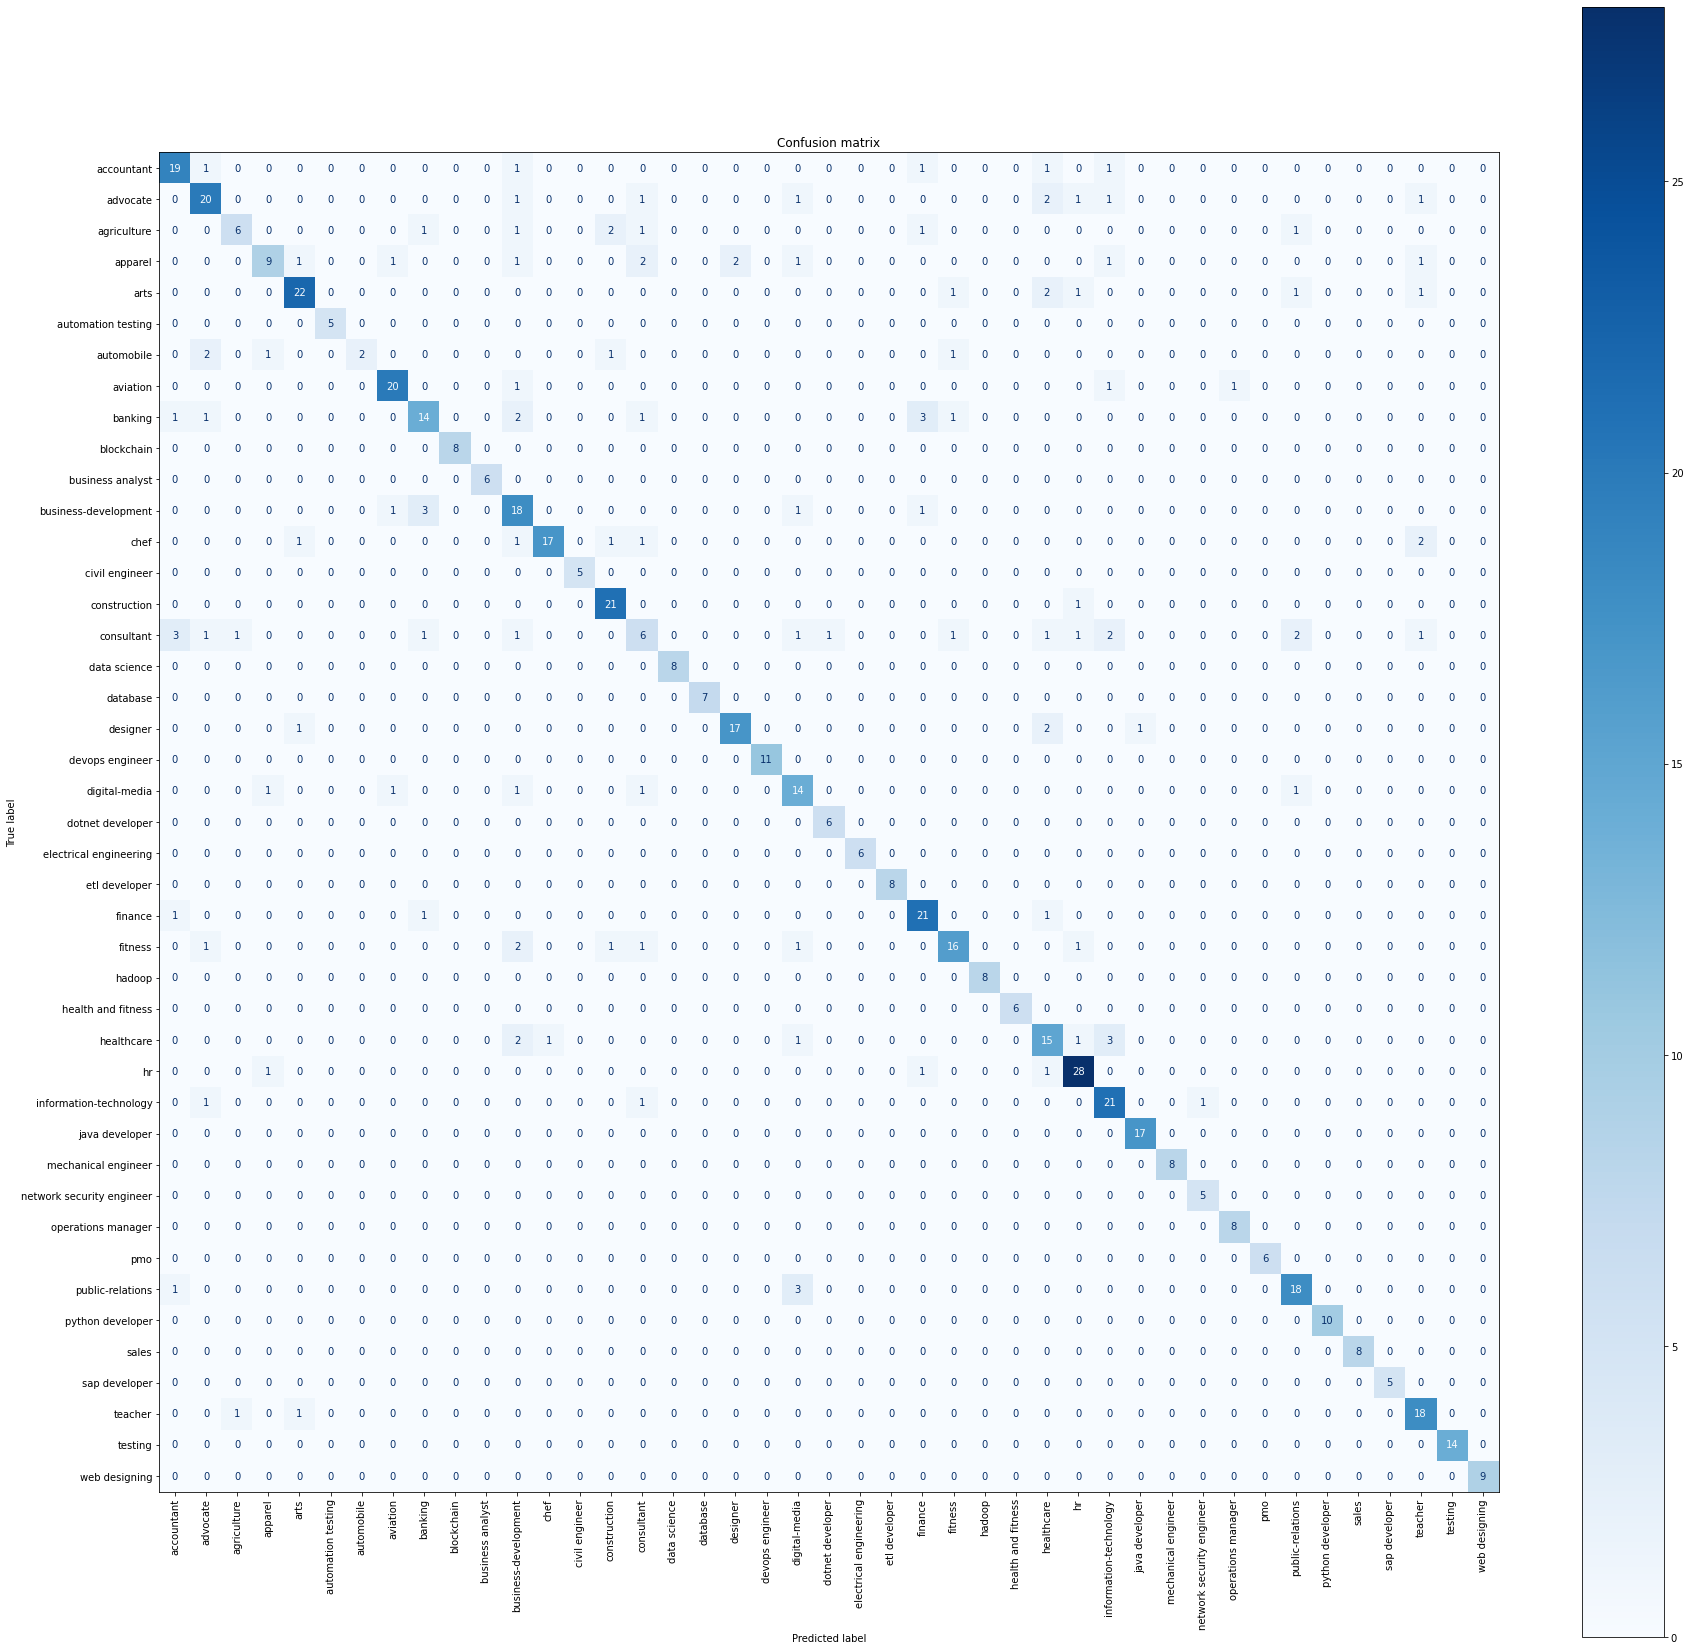

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, prediction)

disp = ConfusionMatrixDisplay(cm, display_labels=cm_labels)

fig, ax = plt.subplots(figsize=(30,30))
ax.set_title("Confusion matrix")
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')

# Document similarity

In [78]:
from sklearn.metrics.pairwise import cosine_similarity

word_vectorizer = TfidfVectorizer(analyzer=clean)
word_vectorizer.fit(resumes['Resume'])
vectorized_resumes = word_vectorizer.transform(resumes['Resume'])
cos_similarity = cosine_similarity(vectorized_resumes)


In [89]:
from statistics import mean

general_mean = []
categories_mean = []
categories = []

for category in resumes['Category'].unique():
    filtered_resumes = resumes[resumes['Category']==category]
    word_vectorizer.fit(filtered_resumes['Resume'])
    vectorized_resumes = word_vectorizer.transform(filtered_resumes['Resume'])
    category_cos_similarity = cosine_similarity(vectorized_resumes)
    i = 0
    row_general_means = []
    row_category_means = []
    for row_id, resume in filtered_resumes.iterrows():
        row_general_means.append(mean(cos_similarity[row_id]))
        row_category_means.append(mean(category_cos_similarity[i]))
        i = i + 1
    general_mean.append(mean(row_general_means))
    categories_mean.append(mean(row_category_means))
    categories.append(category)

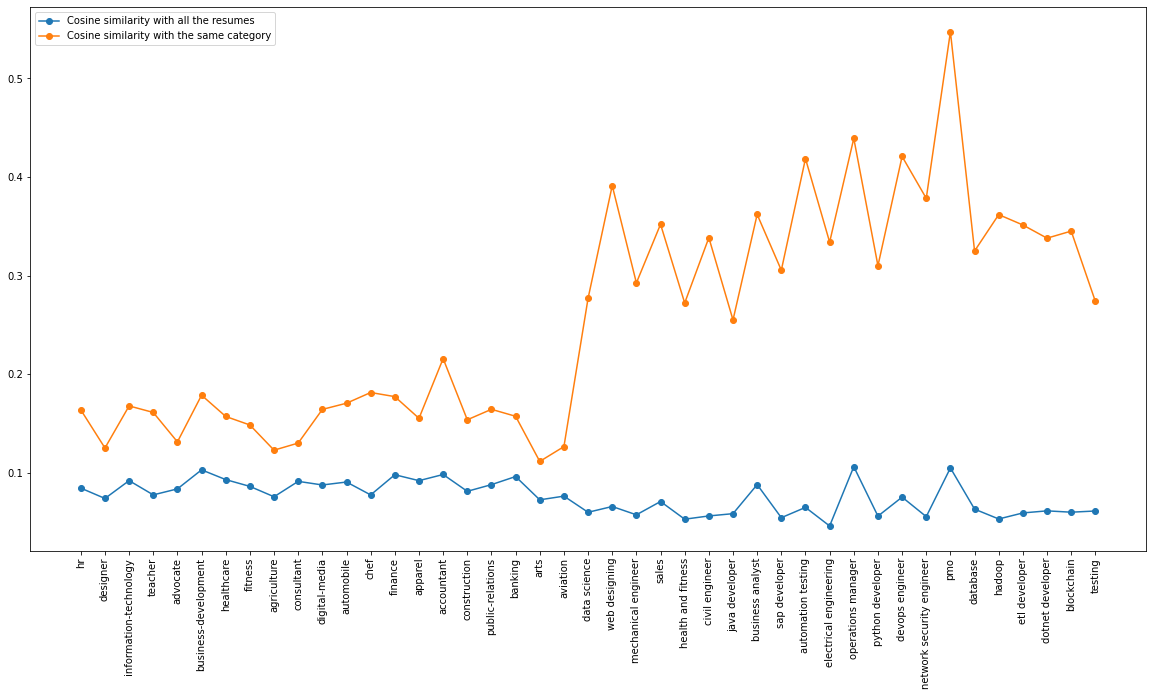

In [104]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(categories, general_mean, label = 'Cosine similarity with all the resumes', marker='o')
ax.plot(categories, categories_mean, label = "Cosine similarity with the same category", marker='o')
ax.legend(loc = 'upper left')
plt.xticks(rotation=90)
plt.show()